In [1]:
#1a

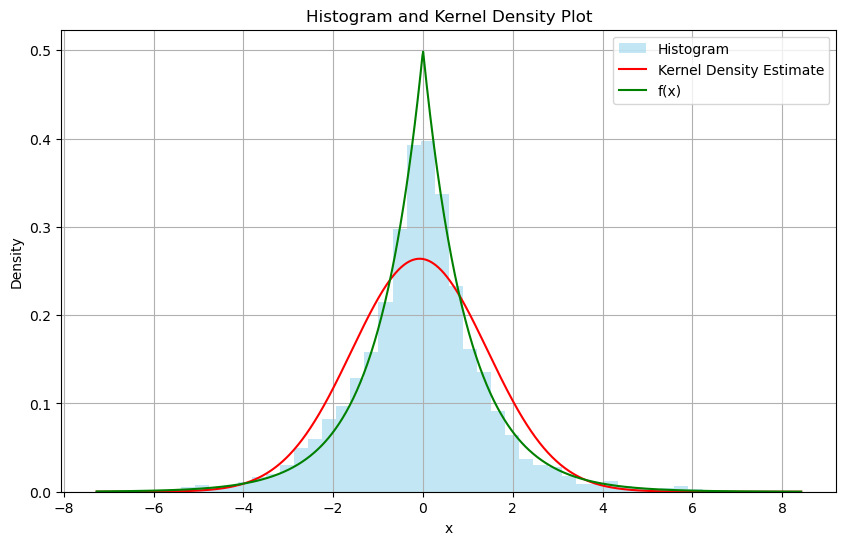

Sample Mean: -0.07508160719087828
Sample Standard Deviation: 1.51189965607254


In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Define the target distribution
def f(x):
    return 0.5 * np.exp(-abs(x))

# Random Walk Metropolis algorithm
def random_walk_metropolis(N, s):
    x = np.zeros(N)
    x[0] = 0  # Initial value
    for i in range(1, N):
        x_prev = x[i - 1]
        x_proposed = np.random.normal(x_prev, s)
        ratio = f(x_proposed) / f(x_prev)
        u = np.random.uniform(0, 1)
        if u < ratio:
            x[i] = x_proposed
        else:
            x[i] = x_prev
    return x

# Parameters
N = 10000
s = 1

# Generate samples
samples = random_walk_metropolis(N, s)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(samples, bins=50, density=True, alpha=0.5, color='skyblue', label='Histogram')

# Plot kernel density estimate
sample_mean = np.mean(samples)
sample_std = np.std(samples)
kde = lambda x: (1/(sample_std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - sample_mean) / sample_std) ** 2)
x_values = np.linspace(np.min(samples), np.max(samples), 1000)
plt.plot(x_values, kde(x_values), color='red', label='Kernel Density Estimate')

# Plot true distribution
plt.plot(x_values, f(x_values), color='green', label='f(x)')

plt.xlabel('x')
plt.ylabel('Density')
plt.title('Histogram and Kernel Density Plot')
plt.legend()
plt.grid(True)
plt.show()

# Report sample mean and standard deviation
print("Sample Mean:", sample_mean)
print("Sample Standard Deviation:", sample_std)


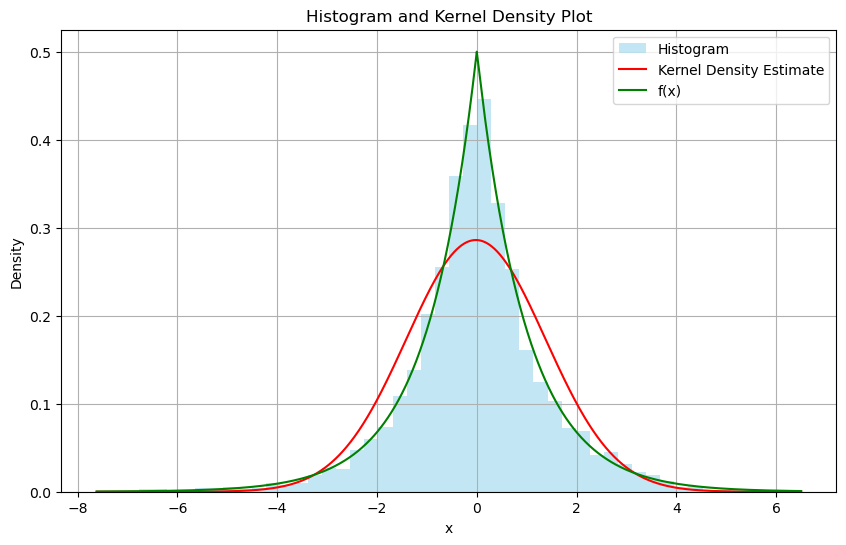

Sample Mean: -0.01789156599980368
Sample Standard Deviation: 1.3954383955814316


In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Define the target distribution
def f(x):
    return 0.5 * np.exp(-abs(x))

# Random Walk Metropolis algorithm
def random_walk_metropolis(N, s):
    x = np.zeros(N)
    x[0] = 0  # Initial value
    for i in range(1, N):
        x_prev = x[i - 1]
        x_proposed = np.random.normal(x_prev, s)
        ratio = f(x_proposed) / f(x_prev)
        u = np.random.uniform(0, 1)
        if u < ratio:
            x[i] = x_proposed
        else:
            x[i] = x_prev
    return x

# Parameters
N = 10000
s = 1

# Generate samples
samples = random_walk_metropolis(N, s)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(samples, bins=50, density=True, alpha=0.5, color='skyblue', label='Histogram')

# Plot kernel density estimate
sample_mean = np.mean(samples)
sample_std = np.std(samples)
kde = lambda x: (1/(sample_std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - sample_mean) / sample_std) ** 2)
x_values = np.linspace(np.min(samples), np.max(samples), 1000)
plt.plot(x_values, kde(x_values), color='red', label='Kernel Density Estimate')

# Plot true distribution
plt.plot(x_values, f(x_values), color='green', label='f(x)')

plt.xlabel('x')
plt.ylabel('Density')
plt.title('Histogram and Kernel Density Plot')
plt.legend()
plt.grid(True)
plt.show()

# Report sample mean and standard deviation
print("Sample Mean:", sample_mean)
print("Sample Standard Deviation:", sample_std)


In [19]:
#1b

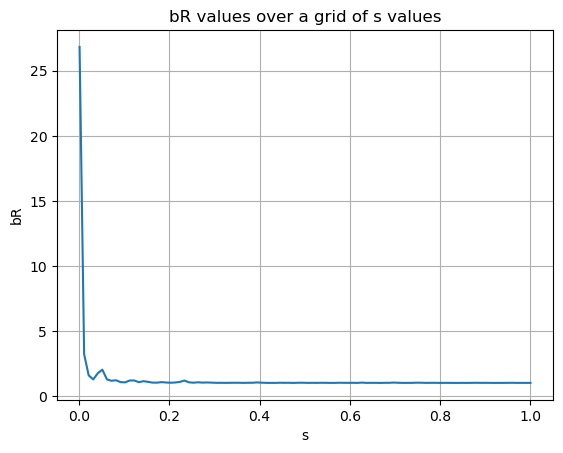

In [16]:
import numpy as np

# Function to generate random walk Metropolis chains
def generate_chains(N, s, J):
    chains = []
    for j in range(J):
        x = np.zeros(N + 1)
        x[0] = np.random.normal(0, 1)  # Initial value
        for i in range(1, N + 1):
            x_proposed = np.random.normal(x[i - 1], s)
            ratio = np.exp(-np.abs(x_proposed)) / np.exp(-np.abs(x[i - 1]))
            u = np.random.uniform(0, 1)
            if u < ratio:
                x[i] = x_proposed
            else:
                x[i] = x[i - 1]
        chains.append(x)
    return chains

# Function to compute sample mean and within-sample variance for each chain
def compute_statistics(chains):
    M = []
    V = []
    for chain in chains:
        M.append(np.mean(chain))
        V.append(np.var(chain))
    return M, V

# Function to compute bR value
def compute_bR(M, V):
    J = len(M)
    W = np.mean(V)
    M_bar = np.mean(M)
    B = np.mean((M - M_bar)**2)
    bR = np.sqrt((B + W) / W)
    return bR

# Define parameters
N = 2000
J = 4
s_values = np.linspace(0.001, 1, 100)  # Values of s in the interval [0.001, 1]

bR_values = []

# Iterate over s values
for s in s_values:
    chains = generate_chains(N, s, J)
    M, V = compute_statistics(chains)
    bR = compute_bR(M, V)
    bR_values.append(bR)

# Plot the bR values over the grid of s values
import matplotlib.pyplot as plt

plt.plot(s_values, bR_values)
plt.xlabel('s')
plt.ylabel('bR')
plt.title('bR values over a grid of s values')
plt.grid(True)
plt.show()


In [37]:
N = 2000
s = 0.001
J = 4

# Generate J sequences (chains)
chains = [random_walk_metropolis(N, s) for _ in range(J)]

# Compute sample mean Mj and within-sample variance Vj for each chain
Mj = [np.mean(chain) for chain in chains]
Vj = [np.var(chain) for chain in chains]

# Compute overall sample mean M and overall within-sample variance W
M = np.mean(Mj)
W = np.mean(Vj)

# Compute between-sample variance B
B = np.mean([(Mj[j] - M)**2 for j in range(J)])

# Calculate bR value
bR = np.sqrt((B + W) / W)

# Print bR value
print("bR value:", bR)

bR value: 1.368525463938898


In [ ]:
#2a

In [13]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os 
os.chdir(r"C:\Users\brand\OneDrive\桌面\ST2195 Course Files\Coursework")
os.getcwd()
conn = sqlite3.connect('Planes.db')
c = conn.cursor()

In [14]:
#loading the data in CSV files into Dataframe in Python
Y1997 = pd.read_csv('1997.csv')
Y1998 = pd.read_csv('1998.csv')
Y1999 = pd.read_csv('1999.csv')
Y2000 = pd.read_csv('2000.csv')
Y2001 = pd.read_csv('2001.csv')
Y2002 = pd.read_csv('2002.csv')
Y2003 = pd.read_csv('2003.csv')
Y2004 = pd.read_csv('2004.csv')
Y2005 = pd.read_csv('2005.csv')
Y2006 = pd.read_csv('2006.csv')

C:\Users\brand\AppData\Local\Temp\ipykernel_16952\1676123627.py:8: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  Y2003 = pd.read_csv('2003.csv')


In [ ]:
#This writes thet record stored in Dataframes as tables to the SQL
Y1997.to_sql('Y1997', con=conn, index=False)
Y1998.to_sql('Y1998', con=conn, index=False)
Y1999.to_sql('Y1999', con=conn, index=False)
Y2000.to_sql('Y2000', con=conn, index=False)
Y2001.to_sql('Y2001', con=conn, index=False)
Y2002.to_sql('Y2002', con=conn, index=False)
Y2003.to_sql('Y2003', con=conn, index=False)
Y2004.to_sql('Y2004', con=conn, index=False)
Y2005.to_sql('Y2005', con=conn, index=False)
Y2006.to_sql('Y2006', con=conn, index=False)

In [3]:
df = pd.read_sql_query('SELECT * FROM Y1997', conn)
df = pd.read_sql_query('SELECT * FROM Y1998', conn)
df = pd.read_sql_query('SELECT * FROM Y1999', conn)
df = pd.read_sql_query('SELECT * FROM Y2000', conn)
df = pd.read_sql_query('SELECT * FROM Y2001', conn)
df = pd.read_sql_query('SELECT * FROM Y2002', conn)
df = pd.read_sql_query('SELECT * FROM Y2003', conn)
df = pd.read_sql_query('SELECT * FROM Y2004', conn)
df = pd.read_sql_query('SELECT * FROM Y2005', conn)
df = pd.read_sql_query('SELECT * FROM Y2006', conn)




In [108]:
# 1 Retrieve Table Names
c.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = c.fetchall()

# Dictionary to store DataFrames with their table names
all_plane_delays_dict = {}

# Iterate over tables
for table in tables:
    table_name = table[0]
    
    c.execute(f'''
        SELECT TAILNUM, ArrDelay, DepDelay, DepTime, DayOfWeek
        FROM {table_name}
    ''')
    
    # Fetching data
    all_plane_data = c.fetchall()

    # Creating a DataFrame from the fetched data
    plane_data = pd.DataFrame(all_plane_data, columns=['TailNum', 'ArrDelay', 'DepDelay','DepTime','DayOfWeek'])
    
    # Convert 'DepHour' to datetime
    plane_data['DepHour'] = pd.to_datetime(plane_data['DepTime'], format='%H%M', errors='coerce')
    
    plane_data['Hour'] = plane_data['DepHour'].dt.hour

    # Filter out rows with negative values in 'ArrDelay' or 'DepDelay' columns
    plane_data_positive = plane_data[(plane_data['ArrDelay'] > 0) & (plane_data['DepDelay'] > 0)]

    # Filter out rows where either 'ArrDelay' or 'DepDelay' is not equal to 0
    plane_data_filtered = plane_data_positive[(plane_data_positive['ArrDelay'] != 0) & (plane_data_positive['DepDelay'] != 0)]

    # Drop rows where both 'ArrDelay' and 'DepDelay' are null
    plane_data_null = plane_data_filtered.dropna(subset=['ArrDelay', 'DepDelay'], how='all')

    # Calculate AvgDelay column
    plane_data_null['AvgDelay'] = (plane_data_null['DepDelay'] + plane_data_null['ArrDelay']) / 2

    # Drop the 'ArrDelay' and 'DepDelay' columns
    plane_data_drop = plane_data_null.drop(columns=['ArrDelay', 'DepDelay','DepHour'])

    # Sort the DataFrame by AvgDelay in descending order
    plane_data_sorted = plane_data_drop.sort_values(by='AvgDelay', ascending=False)
    
    plane_data_sort=plane_data_sorted.dropna()

    # Store the DataFrame with its table name in the dictionary
    all_plane_delays_dict[table_name] = plane_data_sort

# Print or process all sorted DataFrames after the loop
for table_name, df in sorted(all_plane_delays_dict.items()):
    print(f"DataFrame for {table_name}:")
    print(df)


DataFrame for Y1997:
        TailNum  DepTime  DayOfWeek  Hour  AvgDelay
3324231  N155US   1438.0          6  14.0    1613.5
233474   N5DAAA    719.0          4   7.0    1361.0
1045871  N515US    616.0          3   6.0    1336.5
1591459  N8928E    726.0          7   7.0    1314.5
1063818  N2BAAA    555.0          1   5.0    1306.0
...         ...      ...        ...   ...       ...
1234637  N979DL   1136.0          4  11.0       1.0
1234619  N907DE   1856.0          3  18.0       1.0
2542047  N24633   1735.0          5  17.0       1.0
3103717  N263AU   1846.0          5  18.0       1.0
5115182  N8890Z   1146.0          2  11.0       1.0

[1754606 rows x 5 columns]
DataFrame for Y1998:
        TailNum  DepTime  DayOfWeek  Hour  AvgDelay
4291628  N712RC   1505.0          5  15.0    1804.0
1479584  N532US   1625.0          5  16.0    1550.5
1127915  N133JC   1458.0          6  14.0    1373.0
2927600  N325US   1356.0          7  13.0    1365.0
5132288  N572AA    817.0          2   8.0    1

In [34]:
avg_delay_hour = {}
avg_delay_day = {}

# Iterate through each processed DataFrame in all_processed_dfs
for table_name, df in sorted(all_plane_delays_dict.items()):
    avg_delay_hour[table_name] = df.groupby('Hour')['AvgDelay'].mean()
    avg_delay_day[table_name] = df.groupby('DayOfWeek')['AvgDelay'].mean()
    
# Print or process all Series for average delay by hour after the loop
for table_name, series in avg_delay_hour.items():
    print(f"DataFrame for {table_name} (Average Delay by Hour):")
    print(series)
    
# Print or process all Series for average delay by day of week after the loop
for table_name, series in avg_delay_day.items():
    print(f"DataFrame for {table_name} (Average Delay by Day of Week):")
    print(series)


DataFrame for Y2004 (Average Delay by Hour):
Hour
1.0      91.668607
2.0     106.773671
3.0     116.198031
4.0     105.489634
5.0      39.194794
6.0      17.017524
7.0      22.026522
8.0      23.768108
9.0      26.455914
10.0     29.142688
11.0     28.556532
12.0     30.197567
13.0     30.206838
14.0     32.632939
15.0     33.074662
16.0     35.011567
17.0     35.428264
18.0     39.428138
19.0     42.513050
20.0     46.758378
21.0     52.109916
22.0     60.952271
23.0     81.852955
Name: AvgDelay, dtype: float64
DataFrame for Y2005 (Average Delay by Hour):
Hour
1.0      87.993236
2.0     102.674852
3.0     115.104699
4.0     108.069851
5.0      41.690554
6.0      16.813996
7.0      21.338219
8.0      24.314567
9.0      26.516869
10.0     28.799700
11.0     28.687309
12.0     30.173061
13.0     30.452394
14.0     32.494593
15.0     33.161174
16.0     35.585668
17.0     35.605072
18.0     40.000559
19.0     42.730053
20.0     48.163867
21.0     51.211840
22.0     66.225119
23.0     78.52

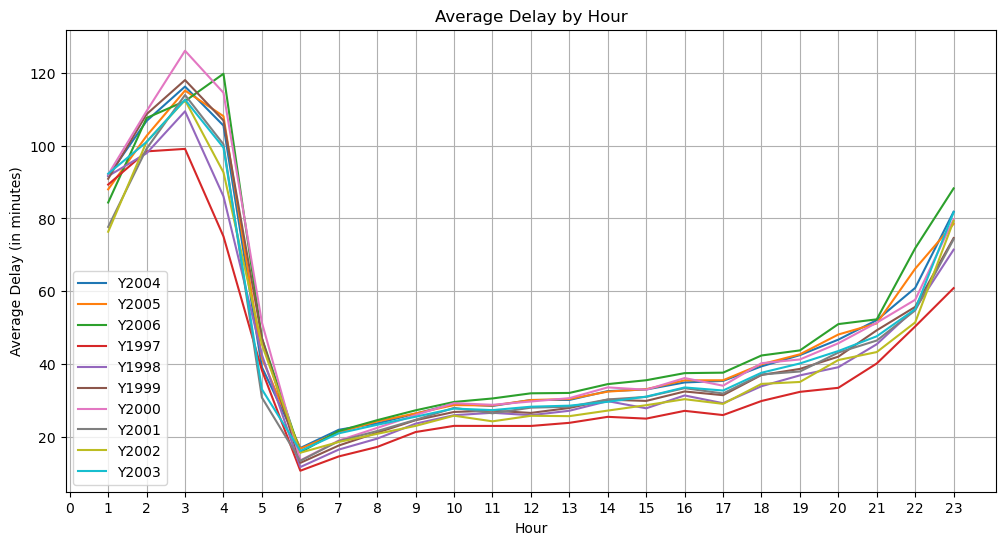

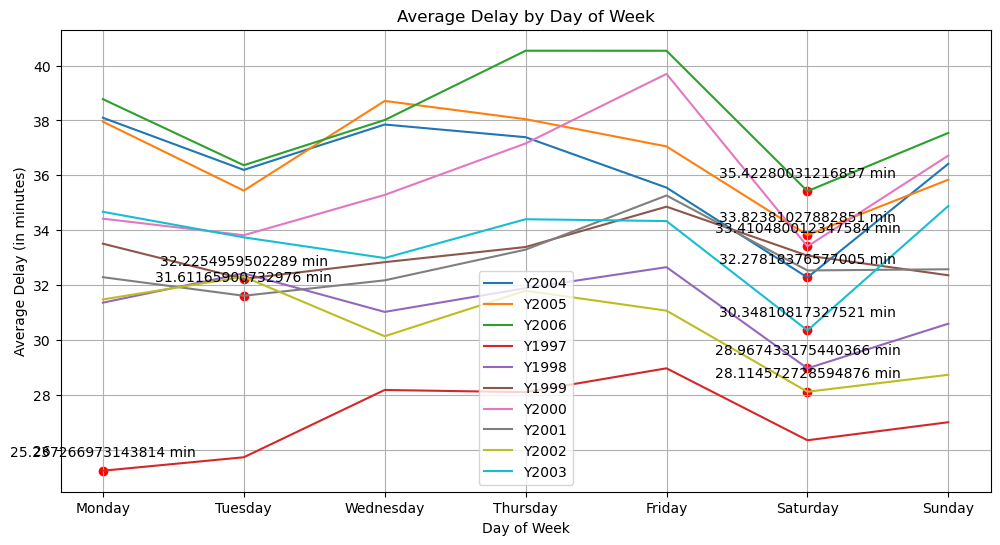

In [57]:
def plot_avg_delay_hour(avg_delay_hour):
    plt.figure(figsize=(12, 6))
    for year, series in avg_delay_hour.items():
        plt.plot(series.index, series.values, label=year)
    plt.title('Average Delay by Hour')
    plt.xlabel('Hour')
    plt.ylabel('Average Delay (in minutes)')
    plt.xticks(range(24))  
    plt.legend()
    plt.grid(True)
    plt.show()

# Define a function to plot average delay by day of week
def plot_avg_delay_day(avg_delay_day):
    plt.figure(figsize=(12, 6))
    for year, series in avg_delay_day.items():
        plt.plot(series.index, series.values, label=year)
        min_day = series.idxmin()  # Find the day with the lowest delay
        min_delay = series[min_day]  # Get the lowest delay value
        plt.scatter(min_day, min_delay, color='red')  # Mark the lowest point
        plt.annotate(f'{min_delay} min', (min_day, min_delay), textcoords="offset points", xytext=(0,10), ha='center')
    plt.title('Average Delay by Day of Week')
    plt.xlabel('Day of Week')
    plt.ylabel('Average Delay (in minutes)')
    plt.xticks(range(1, 8), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot average delay by hour
plot_avg_delay_hour(avg_delay_hour)

# Plot average delay by day of week
plot_avg_delay_day(avg_delay_day)

In [ ]:
#2b

'C:\\Users\\brand\\OneDrive\\桌面\\ST2195 Course Files\\Coursework'

In [66]:
import sqlite3
import pandas as pd
import os

os.chdir(r"C:\Users\brand\OneDrive\桌面\ST2195 Course Files\Coursework")
os.getcwd()

#creating separate database for plane details
conn = sqlite3.connect('Planes_Details.db')
c = conn.cursor()

airports = pd.read_csv('airports.csv')
carriers = pd.read_csv('carriers.csv')
plane_data = pd.read_csv('plane-data.csv')

#airports.to_sql('airports', con=conn, index=False)
#carriers.to_sql('carriers', con=conn, index=False)
#plane_data.to_sql('plane_data', con=conn, index=False)

conn.close()

In [76]:
import sqlite3
import pandas as pd
import os

os.chdir(r"C:\Users\brand\OneDrive\桌面\ST2195 Course Files\Coursework")
os.getcwd()

# Connect to the main database
conn = sqlite3.connect('Planes.db')
c= conn.cursor()

# Attach the other database
c.execute("ATTACH DATABASE 'Planes_Details.db' AS other")

# Query tables from the other database
c.execute("SELECT * FROM other.plane_data")
other_table_data = c.fetchall()


# 2. Retrieve Table Names
c.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = c.fetchall()



In [106]:
# Dictionary to store DataFrames with their table names
all_plane_ages_dict = {}

# Iterate over tables
for table in tables:
    table_name = table[0]
    
    
    c.execute(f'''
        SELECT {table_name}.tailnum, plane_data.year AS plane_manufacture_year, {table_name}.Year AS flight_year
        FROM {table_name}
        JOIN plane_data ON {table_name}.TAILNUM = plane_data.tailnum
    ''')
    plane_data = c.fetchall()

    # Create a DataFrame from the fetched data with column names
    plane_age = pd.DataFrame(plane_data, columns=['TAILNUM', 'plane_manufacture_year', 'flight_year'])

    plane_age['plane_manufacture_year'] = pd.to_numeric(plane_age['plane_manufacture_year'], errors='coerce')
    plane_age['flight_year'] = pd.to_numeric(plane_age['flight_year'], errors='coerce')

    # Drop rows with 0 values in plane_manufacture_year
    plane_age = plane_age[plane_age['plane_manufacture_year'] != 0]

    plane_age.dropna(subset=['plane_manufacture_year', 'flight_year'], inplace=True)

    # Calculate the age of each plane
    plane_age['plane_age'] = plane_age['flight_year'] - plane_age['plane_manufacture_year']

    # Drop rows with negative or zero plane_age
    plane_age = plane_age[plane_age['plane_age'] > 0]

    # Sort the DataFrame by plane_age in descending order
    plane_age_sorted = plane_age.sort_values(by='plane_age', ascending=False)

    # Assign the DataFrame to the dictionary with the table name as key
    all_plane_ages_dict[table_name] = plane_age_sorted

# Print or process all DataFrames after the loop
for table_name, df in sorted(all_plane_ages_dict.items()):
    print(f"DataFrame for {table_name}:")
    print(df)


DataFrame for Y1997:
        TAILNUM  plane_manufacture_year  flight_year  plane_age
866150   N381AA                  1956.0         1997       41.0
1550806  N381AA                  1956.0         1997       41.0
574967   N381AA                  1956.0         1997       41.0
574964   N381AA                  1956.0         1997       41.0
574931   N381AA                  1956.0         1997       41.0
...         ...                     ...          ...        ...
309257   N784AS                  1996.0         1997        1.0
1274375  N593UA                  1996.0         1997        1.0
1654396  N776UA                  1996.0         1997        1.0
1654398  N780UA                  1996.0         1997        1.0
1384827  N784AS                  1996.0         1997        1.0

[1733118 rows x 4 columns]
DataFrame for Y1998:
        TAILNUM  plane_manufacture_year  flight_year  plane_age
925876   N381AA                  1956.0         1998       42.0
1194284  N381AA                  1

In [93]:
#categorising each year's planes by 'old' and 'new'
all_processed_dfs = {}

# Iterate over each DataFrame
for table_name, df in all_plane_ages_dict.items():
    # Define a function to categorize planes as "older" or "newer" based on their age
    def categorize_plane_age(age):
        if age <= 20:
            return 'New'
        else:
            return 'Old'

    # Create a new column in the cleaned DataFrame to indicate whether each plane is older or newer
    df['Plane_Category'] = df['plane_age'].apply(categorize_plane_age)

    # Sort the DataFrame by plane_age in descending order
    plane_age_final = df.drop(columns=['plane_manufacture_year', 'flight_year'])
    plane_age_final_sorted = plane_age_final.sort_values(by='plane_age', ascending=False)

    # Assign the processed DataFrame to the dictionary with the table name as key
    all_processed_dfs[table_name] = plane_age_final_sorted

# Now you can access and analyze each processed DataFrame in the dictionary all_processed_dfs
for table_name, df in sorted(all_processed_dfs.items()):
    print(f"DataFrame for {table_name}:")
    print(df)



DataFrame for Y1997:
        TAILNUM  plane_age Plane_Category
866150   N381AA       41.0            Old
514338   N381AA       41.0            Old
903076   N381AA       41.0            Old
687288   N381AA       41.0            Old
581541   N381AA       41.0            Old
...         ...        ...            ...
58976    N435UA        1.0            New
242447   N547US        1.0            New
343497   N546US        1.0            New
1362818  N537US        1.0            New
1384827  N784AS        1.0            New

[1733118 rows x 3 columns]
DataFrame for Y1998:
        TAILNUM  plane_age Plane_Category
925876   N381AA       42.0            Old
1942362  N381AA       42.0            Old
402000   N381AA       42.0            Old
1770975  N381AA       42.0            Old
1865516  N381AA       42.0            Old
...         ...        ...            ...
944306   N14639        1.0            New
760109   N18119        1.0            New
14403    N792AS        1.0            New
125527

In [94]:
# Define an empty dictionary to store TAILNUMs and their categories
plane_category_dict = {}

# Iterate through each processed DataFrame in all_processed_dfs
for table_name, df in all_processed_dfs.items():
    # Extract TAILNUMs and their corresponding categories from the DataFrame
    tailnums = df['TAILNUM']
    categories = df['Plane_Category']
    
    # Update the dictionary with TAILNUMs and their categories
    plane_category_dict.update(dict(zip(tailnums, categories)))

# Print the updated dictionary
print(plane_category_dict)


{'N381AA': 'Old', 'N3744D': 'Old', 'N567AA': 'Old', 'N201AA': 'Old', 'N421AA': 'Old', 'N378AA': 'Old', 'N575AA': 'Old', 'N550AA': 'Old', 'N14629': 'Old', 'N972CA': 'Old', 'N8933E': 'Old', 'N916RW': 'Old', 'N602NW': 'Old', 'N8923E': 'Old', 'N8932E': 'Old', 'N8920E': 'Old', 'N8921E': 'Old', 'N915RW': 'Old', 'N8928E': 'Old', 'N8926E': 'Old', 'N8929E': 'Old', 'N8925E': 'Old', 'N3324L': 'Old', 'N750NW': 'Old', 'N615AA': 'Old', 'N8938E': 'Old', 'N1309T': 'Old', 'N8960E': 'Old', 'N9333': 'Old', 'N759NW': 'Old', 'N606NW': 'Old', 'N756NW': 'Old', 'N924RW': 'Old', 'N8978E': 'Old', 'N752NW': 'Old', 'N760NW': 'Old', 'N753NW': 'Old', 'N751NW': 'Old', 'N754NW': 'Old', 'N755NW': 'Old', 'N758NW': 'Old', 'N9332': 'Old', 'N923RW': 'Old', 'N608NW': 'Old', 'N8945E': 'Old', 'N8944E': 'Old', 'N921RW': 'Old', 'N425AA': 'Old', 'N523AA': 'Old', 'N1332U': 'Old', 'N8986E': 'Old', 'N9339': 'Old', 'N610NW': 'Old', 'N9346': 'Old', 'N984US': 'Old', 'N762NW': 'Old', 'N9343': 'Old', 'N9338': 'Old', 'N613NW': 'Old', 'N

In [95]:
# Dictionary to store DataFrames with their table names
all_plane_delays_dict = {}

# Iterate over tables
for table in tables:
    table_name = table[0]
    
    c.execute(f'''
        SELECT TAILNUM, ArrDelay, DepDelay
        FROM {table_name}
    ''')
    
    # Fetching data
    plane_delay_data = c.fetchall()

    # Creating a DataFrame from the fetched data
    delay_data = pd.DataFrame(plane_delay_data, columns=['TAILNUM', 'ArrDelay', 'DepDelay'])

    # Filter out rows where either 'ArrDelay' or 'DepDelay' is not equal to 0
    delay_data_filtered = delay_data[(delay_data['ArrDelay'] != 0) & (delay_data['DepDelay'] != 0)]

    # Drop rows where both 'ArrDelay' and 'DepDelay' are null
    delay_data_cleaned = delay_data_filtered.dropna(subset=['ArrDelay', 'DepDelay'], how='all')

    # Filter out rows with negative values in 'ArrDelay' or 'DepDelay' columns
    delay_data_cleaned_positive = delay_data_cleaned[(delay_data_cleaned['ArrDelay'] > 0) & (delay_data_cleaned['DepDelay'] > 0)]

    # Calculate AvgDelay column
    delay_data_cleaned_positive['AvgDelay'] = (delay_data_cleaned_positive['DepDelay'] + delay_data_cleaned_positive['ArrDelay']) / 2

    # Drop the 'ArrDelay' and 'DepDelay' columns
    delay_data_drop = delay_data_cleaned_positive.drop(columns=['ArrDelay', 'DepDelay'])

    # Sort the DataFrame by AvgDelay in descending order
    delay_data_sorted = delay_data_drop.sort_values(by='AvgDelay', ascending=False)

    # Store the DataFrame with its table name in the dictionary
    all_plane_delays_dict[table_name] = delay_data_sorted

# Print or process all sorted DataFrames after the loop
for table_name, df in sorted(all_plane_delays_dict.items()):
    print(f"DataFrame for {table_name}:")
    print(df)


C:\Users\brand\AppData\Local\Temp\ipykernel_16952\1960583354.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delay_data_cleaned_positive['AvgDelay'] = (delay_data_cleaned_positive['DepDelay'] + delay_data_cleaned_positive['ArrDelay']) / 2
C:\Users\brand\AppData\Local\Temp\ipykernel_16952\1960583354.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delay_data_cleaned_positive['AvgDelay'] = (delay_data_cleaned_positive['DepDelay'] + delay_data_cleaned_positive['ArrDelay']) / 2
C:\Users\brand\AppData\L

DataFrame for Y1997:
        TAILNUM  AvgDelay
3324231  N155US    1613.5
233474   N5DAAA    1361.0
1045871  N515US    1336.5
1591459  N8928E    1314.5
1063818  N2BAAA    1306.0
...         ...       ...
1234637  N979DL       1.0
1234619  N907DE       1.0
2542047  N24633       1.0
3103717  N263AU       1.0
5115182  N8890Z       1.0

[1756672 rows x 2 columns]
DataFrame for Y1998:
        TAILNUM  AvgDelay
4291628  N712RC    1804.0
1479584  N532US    1550.5
1127915  N133JC    1373.0
2927600  N325US    1365.0
5132288  N572AA    1356.0
...         ...       ...
2825018   N961N       1.0
422079   N606DL       1.0
1345566  N371US       1.0
774077   N975DL       1.0
1370777   N977Z       1.0

[1643873 rows x 2 columns]
DataFrame for Y1999:
        TAILNUM  AvgDelay
5321057  N727RW    1732.0
166173   N230NW    1637.0
260228   N162US    1533.5
145730   N916RW    1436.0
2491720  N860AA    1396.0
...         ...       ...
4555135  N309UA       1.0
2989432  N671MC       1.0
366156   N921DL       1

In [96]:
# Dictionary to store DataFrames with their table names and categorized plane delays
all_plane_delays_categorized = {}

# Iterate over tables in all_plane_delays_dict
for table_name, df in all_plane_delays_dict.items():
    # Add a new column indicating the category of each plane
    df['Plane_Category'] = df['TAILNUM'].map(plane_category_dict)
    
    # Remove rows with NaN values
    df.dropna(inplace=True)
    
    # Store the DataFrame with its table name in the dictionary
    all_plane_delays_categorized[table_name] = df

# Print or process all categorized DataFrames after the loop
for table_name, df in sorted(all_plane_delays_categorized.items()):
    print(f"DataFrame for {table_name}:")
    print(df)

DataFrame for Y1997:
        TAILNUM  AvgDelay Plane_Category
1045871  N515US    1336.5            New
1591459  N8928E    1314.5            Old
4763297  N493AA    1298.5            New
232326   N467AA    1224.0            New
189316   N438AA    1175.5            New
...         ...       ...            ...
1234641  N974DL       1.0            New
3554379  N438UA       1.0            New
1234637  N979DL       1.0            New
1234619  N907DE       1.0            New
2542047  N24633       1.0            New

[607683 rows x 3 columns]
DataFrame for Y1998:
        TAILNUM  AvgDelay Plane_Category
1479584  N532US    1550.5            New
2927600  N325US    1365.0            New
5132288  N572AA    1356.0            New
3842637  N426AA    1346.0            New
5137382  N279AA    1303.0            New
...         ...       ...            ...
774006   N948DL       1.0            New
2149629  N440UA       1.0            New
4613180  N949DL       1.0            New
422079   N606DL       1.0    

In [98]:
# List to store the average delays for old and new planes
avg_delay_old_planes = []
avg_delay_new_planes = []

# Iterate over each item (year and DataFrame) in all_plane_delays_categorized
for year, df in all_plane_delays_categorized.items():
    # Extract old and new planes from the DataFrame
    old_planes = df[df['Plane_Category'] == 'Old']
    new_planes = df[df['Plane_Category'] == 'New']
    
    # Calculate average delay for old planes
    avg_delay_old = old_planes['AvgDelay'].mean()
    avg_delay_old_planes.append(avg_delay_old)
    
    # Calculate average delay for new planes
    avg_delay_new = new_planes['AvgDelay'].mean()
    avg_delay_new_planes.append(avg_delay_new)

# Print average delays for old and new planes
for i in range(len(avg_delay_old_planes)):
    print(f"Year {list(sorted(all_plane_delays_categorized.keys()))[i]}:")
    print(f"Average Delay for Old Planes: {avg_delay_old_planes[i]}")
    print(f"Average Delay for New Planes: {avg_delay_new_planes[i]}")


Year Y1997:
Average Delay for Old Planes: 34.41582058532929
Average Delay for New Planes: 35.878834126831975
Year Y1998:
Average Delay for Old Planes: 35.87170269110707
Average Delay for New Planes: 37.41483975664608
Year Y1999:
Average Delay for Old Planes: 35.076401330944456
Average Delay for New Planes: 39.38509200623071
Year Y2000:
Average Delay for Old Planes: 32.297330354219234
Average Delay for New Planes: 25.46911110071505
Year Y2001:
Average Delay for Old Planes: 36.34839306210942
Average Delay for New Planes: 30.208517709424523
Year Y2002:
Average Delay for Old Planes: 37.77040868716948
Average Delay for New Planes: 32.493810847200166
Year Y2003:
Average Delay for Old Planes: 39.08580225795416
Average Delay for New Planes: 35.8808084047647
Year Y2004:
Average Delay for Old Planes: 56.91761363636363
Average Delay for New Planes: 37.03730092204526
Year Y2005:
Average Delay for Old Planes: 36.37747128601017
Average Delay for New Planes: 30.028970182084265
Year Y2006:
Average Del

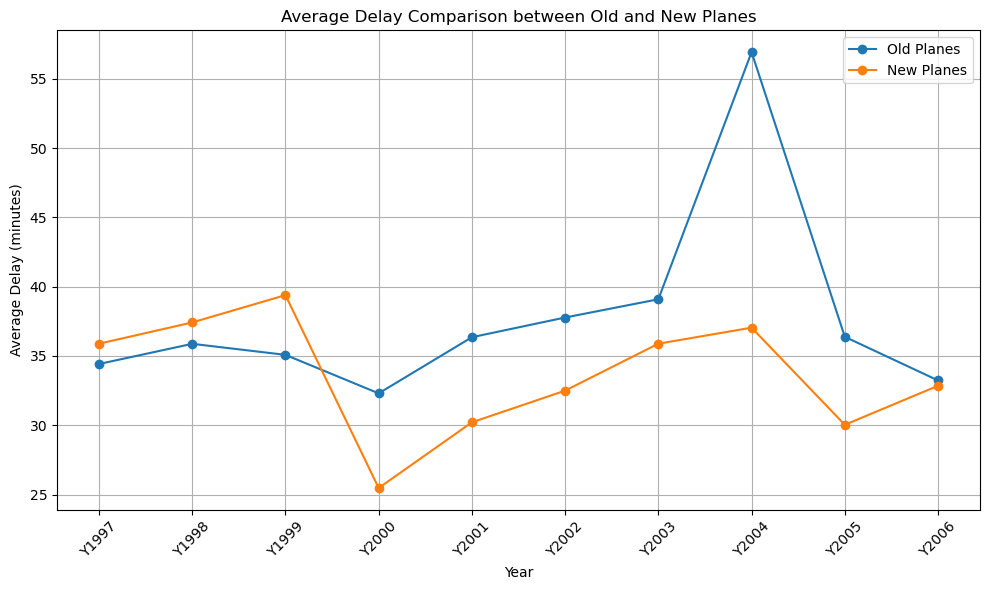

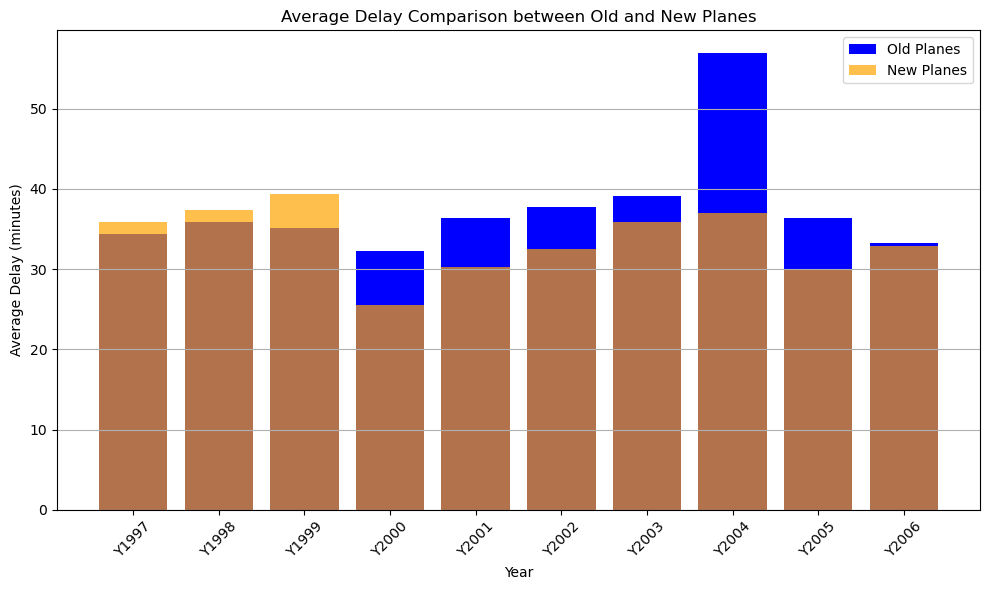

In [100]:
import matplotlib.pyplot as plt

# List of years
years = list(sorted(all_plane_delays_categorized.keys()))

# Plot average delays for old and new planes
plt.figure(figsize=(10, 6))
plt.plot(years, avg_delay_old_planes, marker='o', label='Old Planes')
plt.plot(years, avg_delay_new_planes, marker='o', label='New Planes')
plt.xlabel('Year')
plt.ylabel('Average Delay (minutes)')
plt.title('Average Delay Comparison between Old and New Planes')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Alternatively, you can use a bar plot
plt.figure(figsize=(10, 6))
plt.bar(years, avg_delay_old_planes, label='Old Planes', color='blue')
plt.bar(years, avg_delay_new_planes, label='New Planes', color='orange', alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Average Delay (minutes)')
plt.title('Average Delay Comparison between Old and New Planes')
plt.legend()
plt.grid(axis='y')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [87]:
old_planes_count = (old_planes['AvgDelay']).count()
new_planes_count = (new_planes['AvgDelay']).count()

print("old_planes_count:", old_planes_count)
print("new_planes_count:", new_planes_count)

old_planes_count: 31180
new_planes_count: 701177


In [105]:
# List to store the median delays for old and new planes
median_delay_old_planes = []
median_delay_new_planes = []

# Iterate over each item (year and DataFrame) in all_plane_delays_categorized
for year, df in all_plane_delays_categorized.items():
    # Extract old and new planes from the DataFrame
    old_planes = df[df['Plane_Category'] == 'Old']
    new_planes = df[df['Plane_Category'] == 'New']
    
    # Calculate median delay for old planes
    median_delay_old = old_planes['AvgDelay'].median()
    median_delay_old_planes.append(median_delay_old)
    
    # Calculate median delay for new planes
    median_delay_new = new_planes['AvgDelay'].median()
    median_delay_new_planes.append(median_delay_new)

# Print median delays for old and new planes
for i in range(len(median_delay_old_planes)):
    print(f"Year {list(sorted(all_plane_delays_categorized.keys()))[i]}:")
    print(f"Median Delay for Old Planes: {median_delay_old_planes[i]}")
    print(f"Median Delay for New Planes: {median_delay_new_planes[i]}")



# Calculate median delay for old planes
#median_delay_old_planes = old_planes['AvgDelay'].median()

# Calculate median delay for new planes
#median_delay_new_planes = new_planes['AvgDelay'].median()

# Print median delays
#print("Median delay for old planes:", median_delay_old_planes)
#print("Median delay for new planes:", median_delay_new_planes)

Year Y1997:
Median Delay for Old Planes: 20.0
Median Delay for New Planes: 20.0
Year Y1998:
Median Delay for Old Planes: 20.5
Median Delay for New Planes: 21.0
Year Y1999:
Median Delay for Old Planes: 20.0
Median Delay for New Planes: 22.0
Year Y2000:
Median Delay for Old Planes: 18.0
Median Delay for New Planes: 13.5
Year Y2001:
Median Delay for Old Planes: 19.5
Median Delay for New Planes: 15.0
Year Y2002:
Median Delay for Old Planes: 20.0
Median Delay for New Planes: 16.5
Year Y2003:
Median Delay for Old Planes: 22.0
Median Delay for New Planes: 19.0
Year Y2004:
Median Delay for Old Planes: 28.25
Median Delay for New Planes: 18.5
Year Y2005:
Median Delay for Old Planes: 19.5
Median Delay for New Planes: 15.0
Year Y2006:
Median Delay for Old Planes: 19.0
Median Delay for New Planes: 17.5


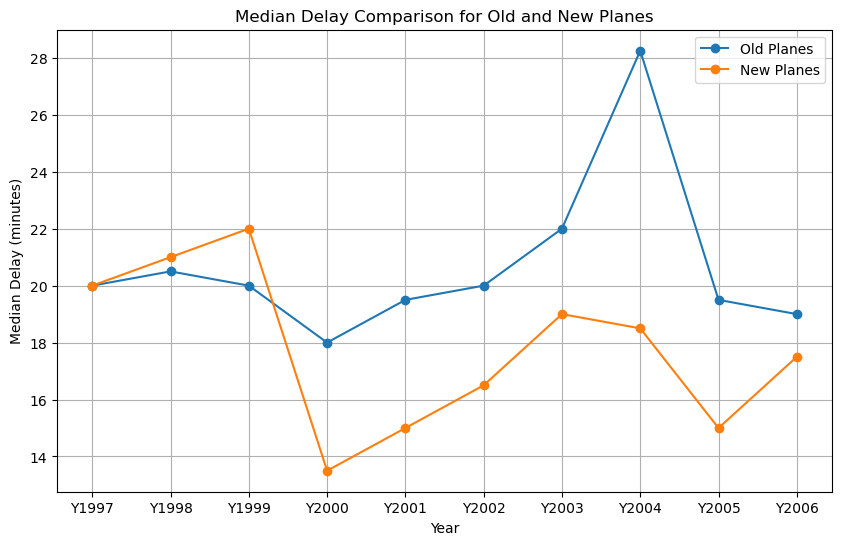

In [107]:
years = list(sorted(all_plane_delays_categorized.keys()))

plt.figure(figsize=(10, 6))
plt.plot(years, median_delay_old_planes, label='Old Planes', marker='o')
plt.plot(years, median_delay_new_planes, label='New Planes', marker='o')
plt.title('Median Delay Comparison for Old and New Planes')
plt.xlabel('Year')
plt.ylabel('Median Delay (minutes)')
plt.legend()
plt.grid(True)
plt.xticks(years)  # Set x-axis ticks to be years
plt.show()

In [ ]:
c.close()
conn.close()

In [ ]:
#2c

In [36]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV      
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer #transform different types



In [37]:

os.chdir(r"C:\Users\brand\OneDrive\桌面\ST2195 Course Files\Coursework")
os.getcwd()

# Connect to the main database
conn = sqlite3.connect('Planes.db')
c= conn.cursor()

# Attach the other database
c.execute("ATTACH DATABASE 'Planes_Details.db' AS other")

# Query tables from the other database
c.execute("SELECT * FROM other.plane_data")
other_table_data = c.fetchall()


# 2. Retrieve Table Names
c.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = c.fetchall()




In [49]:
# Dictionary to store DataFrames with their table names
all_plane_details_dict = {}

# Iterate over tables
for table in tables:
    table_name = table[0]
    
    c.execute(f'''
    SELECT Diverted, CRSArrTime, CRSDepTime, Year, Month, {table_name}.DayofMonth AS Day, {table_name}.UniqueCarrier AS Carrier, Distance
    FROM {table_name}
    ''')

    data = c.fetchall()

    # Create a DataFrame from the fetched data with column names
    plane_diversion = pd.DataFrame(data, columns=['Diverted', 'CRSArrTime', 'CRSDepTime', 'Year', 'Month', 'Day','Carrier', 'Distance'])

    # Combine 'Year', 'Month', and 'DayofMonth' columns into a single column named 'Date'
    plane_diversion['Date'] = pd.to_datetime(plane_diversion[['Year', 'Month', 'Day']])

    # Now you can drop the individual date component columns if needed
    plane_diversion.drop(['Year', 'Month', 'Day'], axis=1, inplace=True)

    # Filter out rows with negative values in 'CRSArrTime' or 'CRSDepTime' columns
    plane_diversion_filter = plane_diversion[(plane_diversion['CRSArrTime'] > 0) & (plane_diversion['CRSDepTime'] > 0)]
    
    # Assign the DataFrame to the dictionary with the table name as key
    all_plane_details_dict[table_name] = plane_diversion_filter

# Print or process all DataFrames after the loop
for table_name, df in all_plane_details_dict.items():
    print(f"DataFrame for {table_name}:")
    print(df)


DataFrame for Y2004:
         Diverted  CRSArrTime  CRSDepTime  Year Carrier  Distance       Date
0               0         915         630  2004      UA       599 2004-01-12
1               0         915         630  2004      UA       599 2004-01-13
2               0         915         630  2004      UA       599 2004-01-14
3               0         915         630  2004      UA       599 2004-01-15
4               0         915         630  2004      UA       599 2004-01-16
...           ...         ...         ...   ...     ...       ...        ...
7129265         0        1716        1639  2004      DL       425 2004-12-16
7129266         0        1239         720  2004      DL      1541 2004-12-16
7129267         0        1504        1330  2004      DL       547 2004-12-16
7129268         0         723         540  2004      DL       545 2004-12-16
7129269         0        1008         813  2004      DL       594 2004-12-16

[7129264 rows x 7 columns]
DataFrame for Y2005:
      

C:\Users\brand\AppData\Local\Temp\ipykernel_16952\1485735240.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_initial.loc[:, 'Date'] = pd.to_datetime(X_initial['Date'])
C:\Users\brand\AppData\Local\Temp\ipykernel_16952\1485735240.py:19: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_initial.loc[:, 'Date'] = pd.to_datetime(X_initial['Date'])
C:\Users\brand\AppData\Local\Temp\ipykernel_16952\1485735240.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

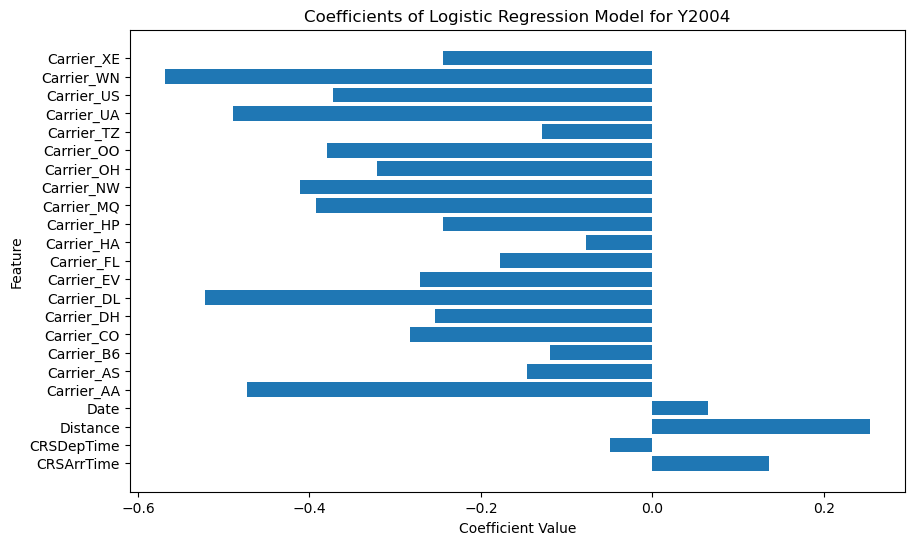

C:\Users\brand\AppData\Local\Temp\ipykernel_16952\1485735240.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_initial.loc[:, 'Date'] = pd.to_datetime(X_initial['Date'])
C:\Users\brand\AppData\Local\Temp\ipykernel_16952\1485735240.py:19: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_initial.loc[:, 'Date'] = pd.to_datetime(X_initial['Date'])
C:\Users\brand\AppData\Local\Temp\ipykernel_16952\1485735240.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

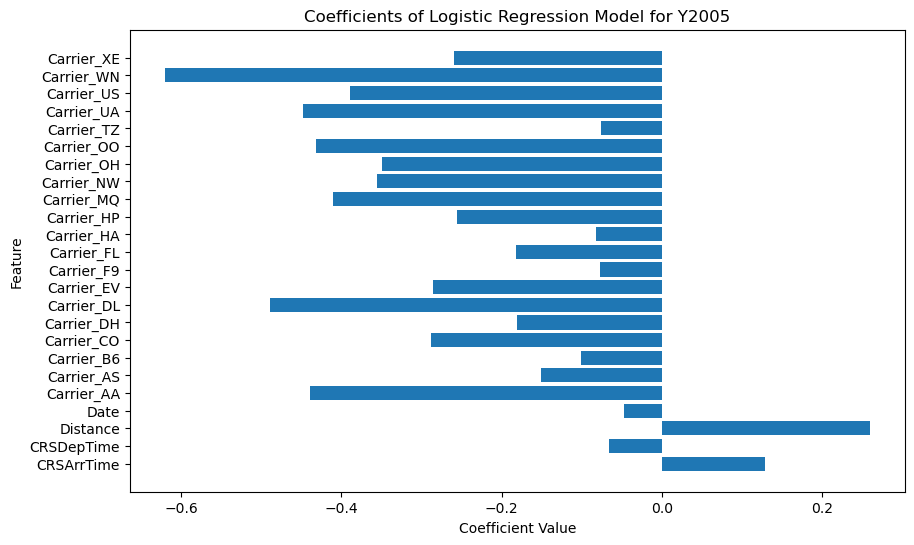

C:\Users\brand\AppData\Local\Temp\ipykernel_16952\1485735240.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_initial.loc[:, 'Date'] = pd.to_datetime(X_initial['Date'])
C:\Users\brand\AppData\Local\Temp\ipykernel_16952\1485735240.py:19: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_initial.loc[:, 'Date'] = pd.to_datetime(X_initial['Date'])
C:\Users\brand\AppData\Local\Temp\ipykernel_16952\1485735240.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

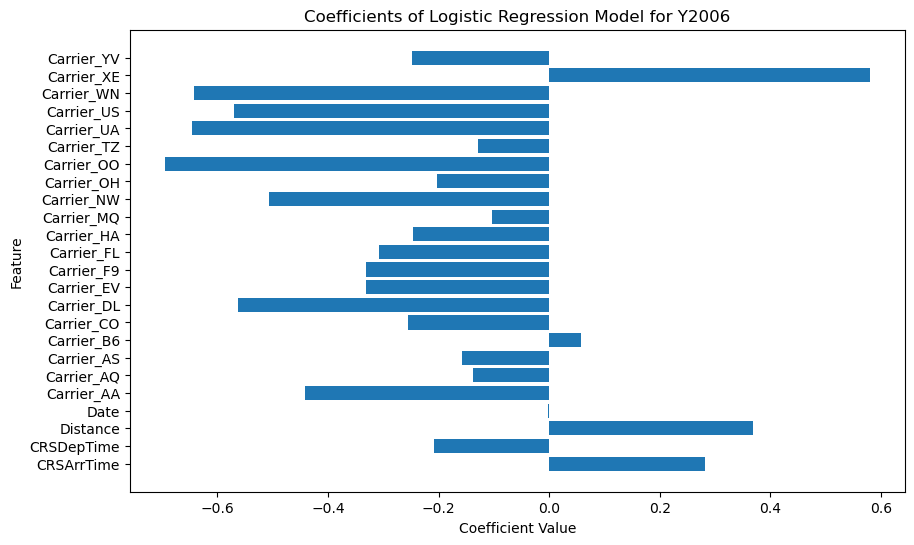

C:\Users\brand\AppData\Local\Temp\ipykernel_16952\1485735240.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_initial.loc[:, 'Date'] = pd.to_datetime(X_initial['Date'])
C:\Users\brand\AppData\Local\Temp\ipykernel_16952\1485735240.py:19: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_initial.loc[:, 'Date'] = pd.to_datetime(X_initial['Date'])
C:\Users\brand\AppData\Local\Temp\ipykernel_16952\1485735240.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

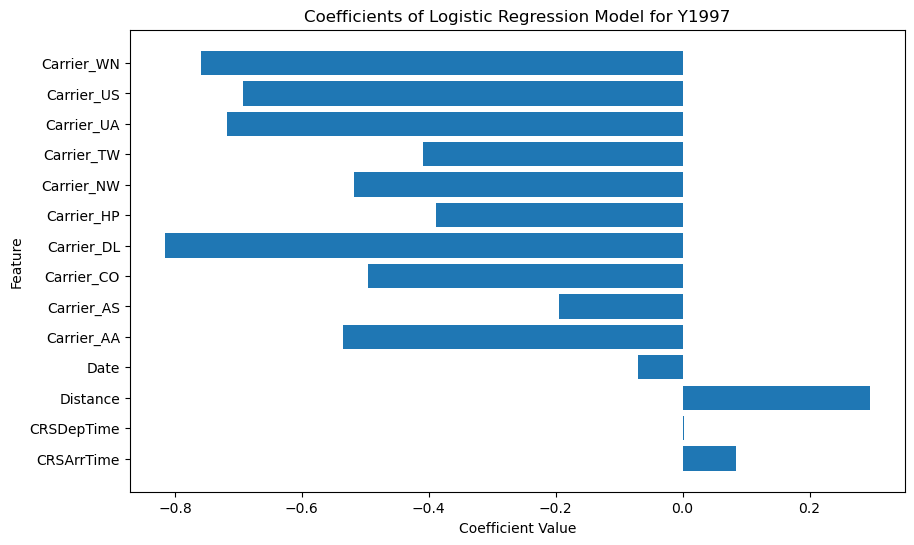

C:\Users\brand\AppData\Local\Temp\ipykernel_16952\1485735240.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_initial.loc[:, 'Date'] = pd.to_datetime(X_initial['Date'])
C:\Users\brand\AppData\Local\Temp\ipykernel_16952\1485735240.py:19: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_initial.loc[:, 'Date'] = pd.to_datetime(X_initial['Date'])
C:\Users\brand\AppData\Local\Temp\ipykernel_16952\1485735240.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

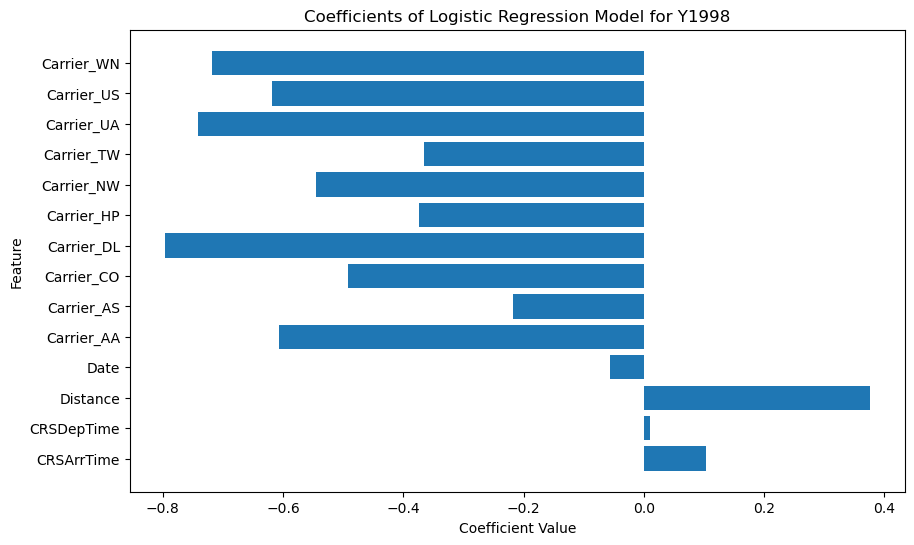

C:\Users\brand\AppData\Local\Temp\ipykernel_16952\1485735240.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_initial.loc[:, 'Date'] = pd.to_datetime(X_initial['Date'])
C:\Users\brand\AppData\Local\Temp\ipykernel_16952\1485735240.py:19: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_initial.loc[:, 'Date'] = pd.to_datetime(X_initial['Date'])
C:\Users\brand\AppData\Local\Temp\ipykernel_16952\1485735240.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

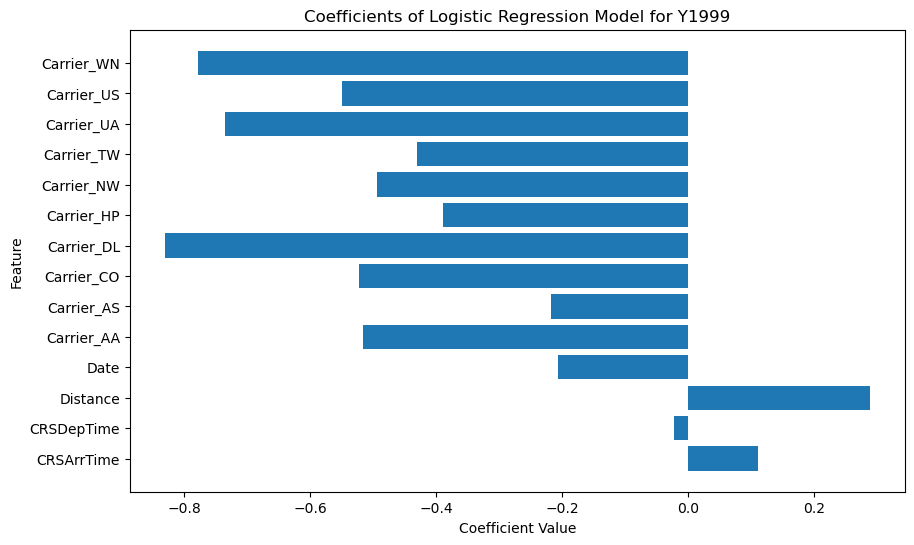

C:\Users\brand\AppData\Local\Temp\ipykernel_16952\1485735240.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_initial.loc[:, 'Date'] = pd.to_datetime(X_initial['Date'])
C:\Users\brand\AppData\Local\Temp\ipykernel_16952\1485735240.py:19: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_initial.loc[:, 'Date'] = pd.to_datetime(X_initial['Date'])
C:\Users\brand\AppData\Local\Temp\ipykernel_16952\1485735240.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

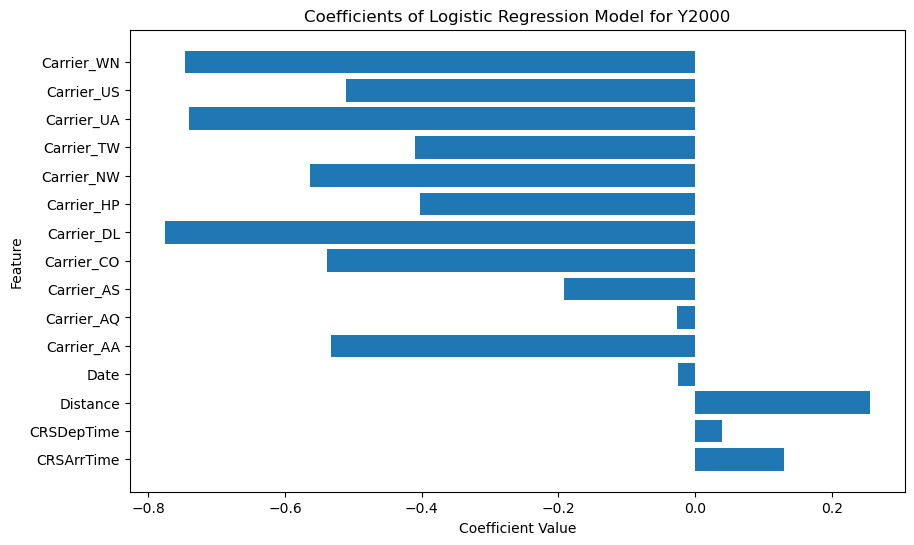

C:\Users\brand\AppData\Local\Temp\ipykernel_16952\1485735240.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_initial.loc[:, 'Date'] = pd.to_datetime(X_initial['Date'])
C:\Users\brand\AppData\Local\Temp\ipykernel_16952\1485735240.py:19: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_initial.loc[:, 'Date'] = pd.to_datetime(X_initial['Date'])
C:\Users\brand\AppData\Local\Temp\ipykernel_16952\1485735240.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

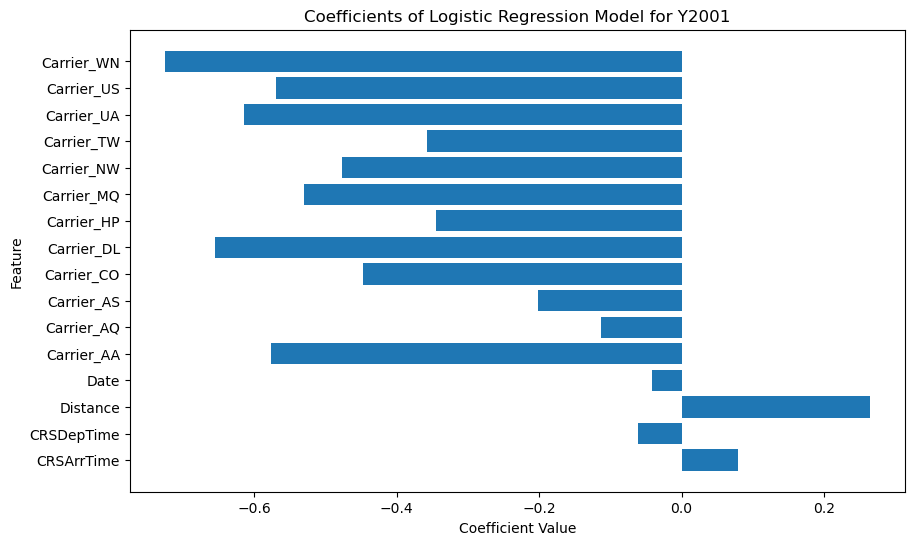

C:\Users\brand\AppData\Local\Temp\ipykernel_16952\1485735240.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_initial.loc[:, 'Date'] = pd.to_datetime(X_initial['Date'])
C:\Users\brand\AppData\Local\Temp\ipykernel_16952\1485735240.py:19: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_initial.loc[:, 'Date'] = pd.to_datetime(X_initial['Date'])
C:\Users\brand\AppData\Local\Temp\ipykernel_16952\1485735240.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

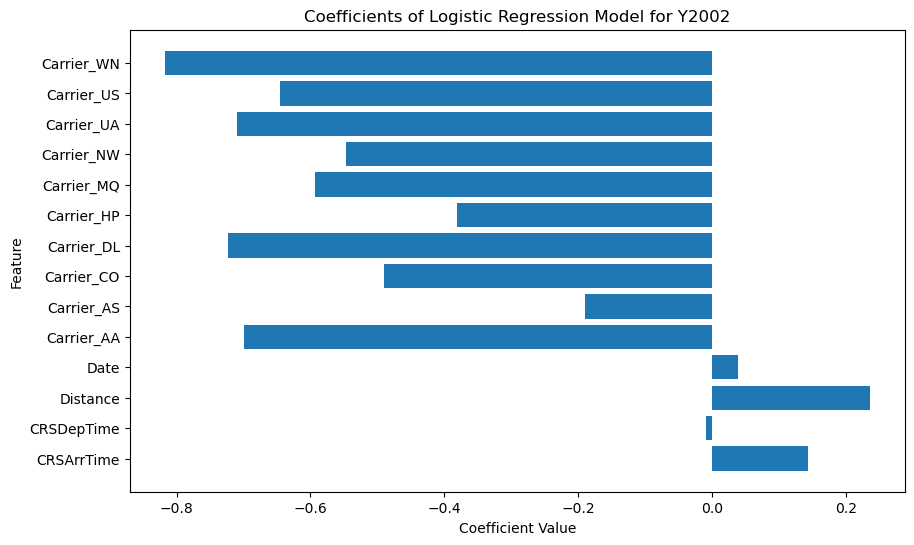

C:\Users\brand\AppData\Local\Temp\ipykernel_16952\1485735240.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_initial.loc[:, 'Date'] = pd.to_datetime(X_initial['Date'])
C:\Users\brand\AppData\Local\Temp\ipykernel_16952\1485735240.py:19: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_initial.loc[:, 'Date'] = pd.to_datetime(X_initial['Date'])
C:\Users\brand\AppData\Local\Temp\ipykernel_16952\1485735240.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

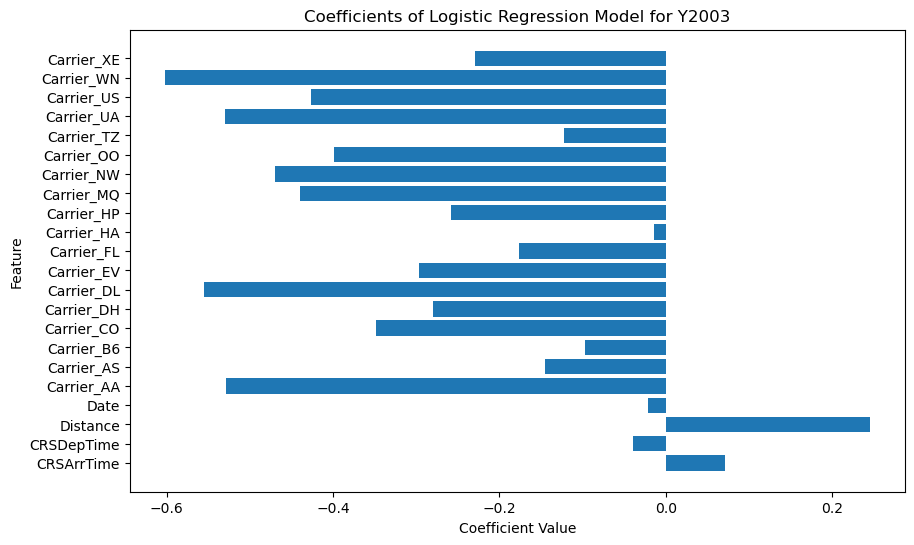

In [43]:
# Dictionary to store trained logistic regression models for each dataframe
trained_models = {}

# Define the features and target variable
features = ['CRSArrTime', 'CRSDepTime', 'Carrier', 'Distance', 'Date']
target = 'Diverted'

for table_name, df in all_plane_details_dict.items():
    # Extract features and target variable
    X_initial = df[features]
    y = df[target]
    
    
    # Define numerical and categorical features
    numerical_features = ['CRSArrTime', 'CRSDepTime', 'Distance','Date']
    categorical_features = ['Carrier']

    # Convert 'Date' column to datetime
    X_initial.loc[:, 'Date'] = pd.to_datetime(X_initial['Date'])

    # Convert 'Date' column to ordinal
    X_initial.loc[:, 'Date'] = X_initial['Date'].apply(lambda x: x.toordinal())

    # Set up preprocessing pipelines for numerical and categorical features
    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer()),
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    # Create a ColumnTransformer to apply the appropriate preprocessing to each type of feature
    data_transformer = ColumnTransformer(transformers=[
        ('numerical', numerical_transformer, numerical_features),
        ('categorical', categorical_transformer, categorical_features)
    ])

    # Construct a pipeline that applies the data transformation and trains a logistic regression model
    pipe_lr = Pipeline(steps=[
        ('data_transformer', data_transformer),
        ('logistic_regression', LogisticRegression(max_iter=10000))
    ])

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_initial, y, test_size=0.2, random_state=42)

    # Fit the pipeline to the training data
    pipe_lr.fit(X_train, y_train)

    # Store the trained model
    trained_models[table_name] = pipe_lr

    # Extract coefficients from the pipeline
    coefficients = pipe_lr.named_steps['logistic_regression'].coef_[0]

    # Get the one-hot encoded feature names
    categorical_feature_names = pipe_lr.named_steps['data_transformer'].transformers_[1][1]['onehot'].get_feature_names_out(categorical_features)

    # Concatenate numerical and categorical feature names
    feature_names = numerical_features + list(categorical_feature_names)

    # Create a DataFrame with coefficients and feature names
    coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

    # Plot coefficients
    plt.figure(figsize=(10, 6))
    plt.barh(coefficients_df['Feature'], coefficients_df['Coefficient'])
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.title(f'Coefficients of Logistic Regression Model for {table_name}')
    plt.show()


C:\Users\brand\AppData\Local\Temp\ipykernel_16952\2590728611.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_initial['Date'] = pd.to_datetime(X_initial['Date'])
C:\Users\brand\AppData\Local\Temp\ipykernel_16952\2590728611.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_initial['Date'] = X_initial['Date'].apply(lambda x: x.toordinal())
C:\Users\brand\AppData\Local\Temp\ipykernel_16952\2590728611.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

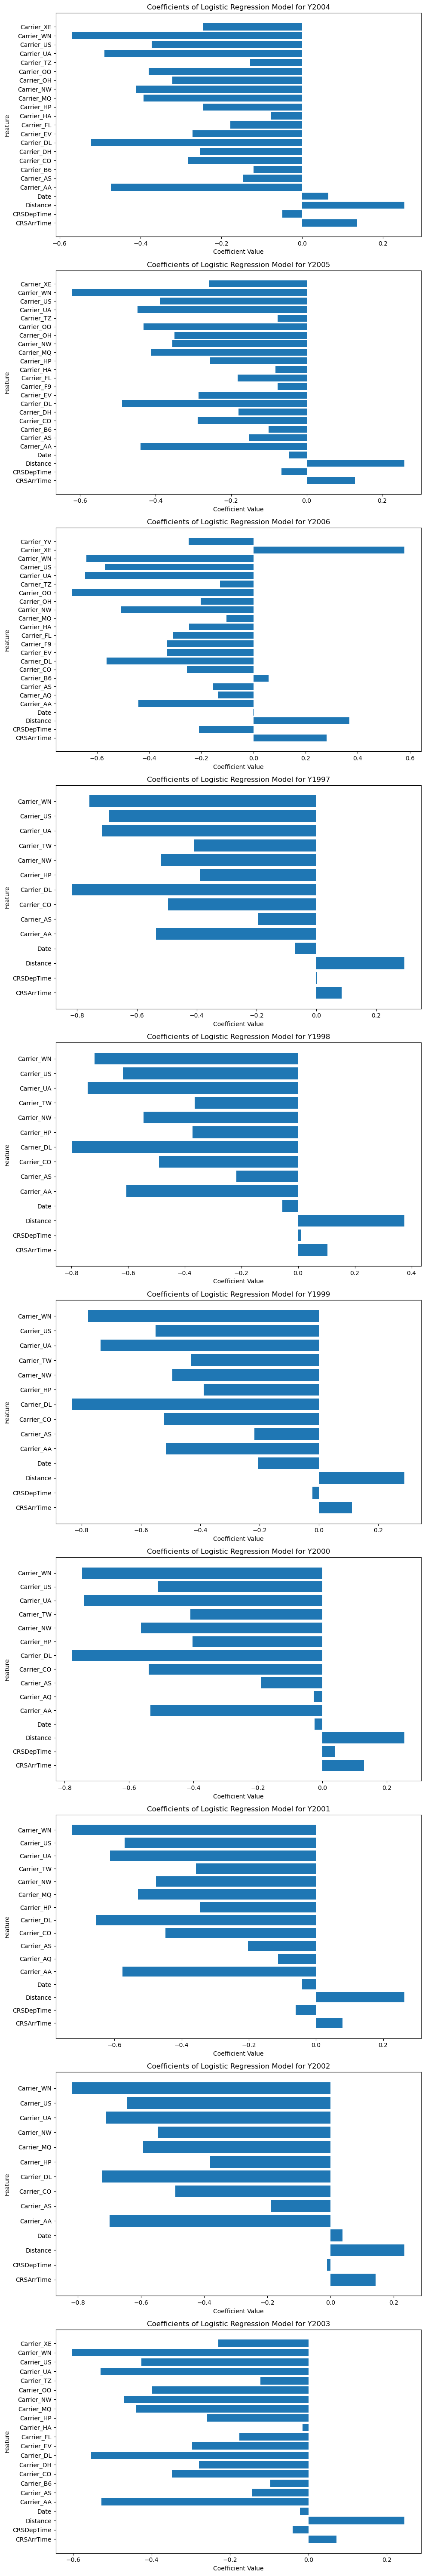

In [55]:
# Dictionary to store trained logistic regression models for each dataframe
trained_models = {}

# Define the features and target variable
features = ['CRSArrTime', 'CRSDepTime', 'Carrier', 'Distance', 'Date']
target = 'Diverted'

# Create a figure to hold all plots
plt.figure(figsize=(10, 6 * len(all_plane_details_dict)))

for table_name, df in all_plane_details_dict.items():
    # Extract features and target variable
    X_initial = df[features]
    y = df[target]
    
    # Define numerical and categorical features
    numerical_features = ['CRSArrTime', 'CRSDepTime', 'Distance','Date']
    categorical_features = ['Carrier']

    # Convert 'Date' column to datetime
    X_initial['Date'] = pd.to_datetime(X_initial['Date'])

    # Convert 'Date' column to ordinal
    X_initial['Date'] = X_initial['Date'].apply(lambda x: x.toordinal())

    # Set up preprocessing pipelines for numerical and categorical features
    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer()),
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    # Create a ColumnTransformer to apply the appropriate preprocessing to each type of feature
    data_transformer = ColumnTransformer(transformers=[
        ('numerical', numerical_transformer, numerical_features),
        ('categorical', categorical_transformer, categorical_features)
    ])

    # Construct a pipeline that applies the data transformation and trains a logistic regression model
    pipe_lr = Pipeline(steps=[
        ('data_transformer', data_transformer),
        ('logistic_regression', LogisticRegression(max_iter=10000))
    ])

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_initial, y, test_size=0.2, random_state=42)

    # Fit the pipeline to the training data
    pipe_lr.fit(X_train, y_train)

    # Store the trained model
    trained_models[table_name] = pipe_lr

    # Extract coefficients from the pipeline
    coefficients = pipe_lr.named_steps['logistic_regression'].coef_[0]

    # Get the one-hot encoded feature names dynamically
    onehot_columns = pipe_lr.named_steps['data_transformer'].transformers_[1][1]['onehot'].get_feature_names_out(categorical_features)
    numerical_and_onehot_features = numerical_features + list(onehot_columns)

    # Create a DataFrame with coefficients and feature names
    coefficients_df = pd.DataFrame({'Feature': numerical_and_onehot_features, 'Coefficient': coefficients})

    # Plot coefficients
    plt.subplot(len(all_plane_details_dict), 1, len(trained_models))
    plt.barh(coefficients_df['Feature'], coefficients_df['Coefficient'])
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.title(f'Coefficients of Logistic Regression Model for {table_name}')

plt.tight_layout()
plt.show()
